In [ ]:
import pandas as pd
import numpy as np
from math import log2
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/CS760/HW3/

/content/drive/MyDrive/CS760/HW3


In [ ]:
features = np.array([[0,3,0], [2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]])
point = np.array([0,0,0])
for row in range(np.shape(features)[0]):
  print(np.linalg.norm(features[row] - point))

3.0
2.0
3.1622776601683795
2.23606797749979
1.4142135623730951
1.7320508075688772


In [ ]:
np.shape(features)

(6, 3)

# 3

In [ ]:
x1 = np.random.rand(10000000)
x2 = np.random.rand(10000000)

In [ ]:
df_3 = pd.DataFrame()
df_3['x1'] = x1
df_3['x2'] = x2

In [ ]:
df_3

,x1,x2
0,0.772851,0.252300
1,0.721595,0.778713
2,0.180398,0.672012
3,0.858303,0.615675
4,0.800560,0.080793
...,...,...
9999995,0.299867,0.153347
9999996,0.179161,0.604984
9999997,0.619331,0.707774
9999998,0.301125,0.579316


In [ ]:
f1 = df_3[df_3['x1']>0.55]
f2 = f1[f1['x1']<=0.65]
f3 = f2[f2['x2']>0.3]
f4 = f3[f3['x2']<=0.4]

In [ ]:
len(f4), len(f4)/len(df_3), 1/100, 0.1**100

(100378, 0.0100378, 0.01, 1.0000000000000056e-100)

In [ ]:
0.1**(1/100)

0.9772372209558107

# 5

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
pred = [0.95,0.85,0.8,0.7,0.55,0.45,0.4,0.3,0.2,0.1]
true = [1,1,0,1,1,0,1,1,0,0]

In [ ]:
#ns_fpr, ns_tpr, _ = roc_curve(true, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(true, pred)

No handles with labels found to put in legend.


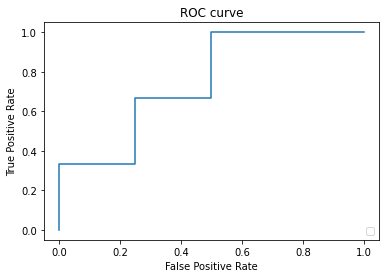

In [ ]:
plt.plot(lr_fpr, lr_tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
_

array([1.95, 0.95, 0.85, 0.8 , 0.55, 0.45, 0.3 , 0.1 ])

#  6

In [ ]:
import math

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
X = np.c_[np.ones((x.shape[0], 1)), x]

In [ ]:
X

array([[1., 3., 2.]])

In [ ]:
w1 = w2 = b = 0
eta = 0.1
theta = np.array([0,0, 0])
b = 0
x = np.resize(np.array([1,3,2]), (1,3)) # set xo = 1
y = np.resize(np.array(1), (1,1))
n = 1

In [ ]:
def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z)))

In [ ]:
def cost(X, y, theta):
  y1 = hypothesis(X,theta)

  return - np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [ ]:
def gradient(theta, x, y):
  return np.dot(x.T, hypothesis(x, theta) - y)

In [ ]:
gradient(theta, x, y)

array([[-0.5000001],
       [-1.5000003],
       [-1.0000002]])

In [ ]:
theta1 = theta - eta * gradient(theta, x, y).T

In [ ]:
theta1

array([[0.05000001, 0.15000003, 0.10000002]])

# 2

In [ ]:
df = pd.read_csv('D2z.txt', header = None, sep = ' ')

In [ ]:
df_neg = df[df[2]==0]
df_pos = df[df[2]==1]

In [ ]:
# generate dataset

# define the x and y scale
x1grid = np.arange(-2, 2, 0.1)
x2grid = np.arange(-2, 2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))


In [ ]:
df_arr = np.array(df[[0,1]])
preds = []
for g in range(grid.shape[0]):
  distances = []
  for d in range(len(df)):
    d = np.linalg.norm(grid[g]-df_arr[d])
    distances.append(d)
  dist_arr = np.array(distances)
  min_dist = min(dist_arr)
  closest_ind = np.argwhere(dist_arr==min_dist)
  preds.append(df.loc[int(closest_ind), 2])

In [ ]:
len(preds), len(grid)

(1600, 1600)

In [ ]:
df_preds = pd.DataFrame()
df_preds['feat1'] = grid[:,0]
df_preds['feat2'] = grid[:,1]
df_preds['preds'] = preds

In [ ]:
df_preds_neg = df_preds[df_preds['preds']==0]
df_preds_pos = df_preds[df_preds['preds']==1]

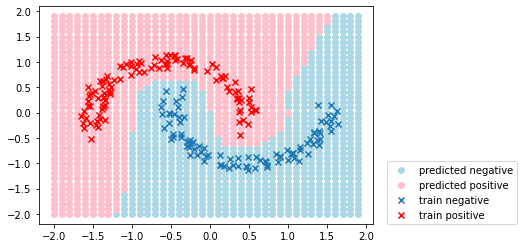

In [ ]:
arr1 = plt.scatter(df_preds_neg['feat1'], df_preds_neg['feat2'], c= '#add8e6')
arr2 = plt.scatter(df_preds_pos['feat1'], df_preds_pos['feat2'], c = '#FFC0CB')

arr3 = plt.scatter(df_neg[0], df_neg[1], marker = 'x')
arr4 = plt.scatter(df_pos[0], df_pos[1], c = 'r', marker = 'x')

plt.legend([arr1, arr2, arr3, arr4], ['predicted negative','predicted positive', 'train negative', 'train positive'], loc=(1.04,0))

## 2.2 email

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
df_email = pd.read_csv('emails.csv')

In [ ]:
df_email

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Email 4996,20,6,3,1,1,1,34,0,0,15,18,2,0,2,38,5,0,6,0,0,0,0,0,27,7,1,0,0,2,0,0,2,0,19,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4996,Email 4997,0,7,1,0,0,0,20,1,1,0,2,3,1,1,15,2,0,0,0,0,1,0,0,13,0,0,0,4,2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4997,Email 4998,6,8,1,3,2,1,64,7,1,16,13,4,1,3,55,13,0,3,0,3,5,9,1,51,1,6,0,0,6,1,0,6,0,3,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4998,Email 4999,8,6,2,5,6,1,51,4,0,4,9,10,5,2,42,2,2,1,2,1,0,14,1,41,1,4,0,1,4,1,0,9,2,4,0,3,2,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
folds = []
start = 0
for i in range(5):
  df_copy = df_email.copy()
  end = start +1000
  test = df_copy[start:end]
  train = df_copy.drop(df_copy.index[start:end])
  print(len(test), len(train))
  folds.append([train, test])
  start +=1000

1000 4000
1000 4000
1000 4000
1000 4000
1000 4000


In [ ]:
def one_NN(df_test, df_train):
  preds = []
  for test_row in range(len(df_test)):
    distances = np.sqrt(np.sum(np.power(arr_train[:, 1:-1] - arr_test[test_row,1:-1],2), 1).astype('float'))
    min_dist = min(distances)
    closest_ind = np.argwhere(distances==min_dist)

    # obtain most frequent prediction of closest entries if there's a tie
    preds.append(df_train.iloc[closest_ind[0], -1].mode()[0])
  return preds

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)

In [ ]:
preds0 = neigh.predict(df_test.iloc[:,1:-1])

In [ ]:
accuracy0 = accuracy_score(df_test.iloc[:,-1], preds0)

In [ ]:
recall = recall_score(df_test.iloc[:,-1], preds0)
precision = precision_score(df_test.iloc[:,-1], preds0)

In [ ]:
len(f[1])

1000

In [ ]:
for i, f in enumerate(folds):
  print('fold', i)
  train = f[0]
  test = f[1]
  neigh.fit(train.iloc[:, 1:-1], train.iloc[:,-1])
  preds = neigh.predict(test.iloc[:,1:-1])
  test_y = test.iloc[:,-1]
  print('accuracy', accuracy_score(test_y, preds))
  print('precision',precision_score(test_y, preds))
  print('recall',recall_score(test_y, preds))

fold 0


KeyboardInterrupt: ignored

In [ ]:
preds1 = one_NN(folds[0][0], folds[0][1])

KeyboardInterrupt: ignored

In [ ]:
p = 2
preds2 = one_NN(folds[p][0], folds[p][1])

In [ ]:
p = 3
preds3 = one_NN(folds[p][0], folds[p][1])

## 2.3

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
accuracy = []
precision = []
recall = []
for i, f in enumerate(folds):
  train = f[0]
  test = f[1]
  clf = LogisticRegression(random_state=0, max_iter=1000).fit(train.iloc[:, 1:-1], train.iloc[:,-1])
  preds = clf.predict(test.iloc[:,1:-1])
  test_y = test.iloc[:,-1]
  accuracy.append(accuracy_score(test_y, preds))
  precision.append(precision_score(test_y, preds))
  recall.append(recall_score(test_y, preds))

In [ ]:
accuracy

[0.971, 0.973, 0.969, 0.958, 0.942]

In [ ]:
precision

[0.9266666666666666,
 0.9401408450704225,
 0.9347079037800687,
 0.9285714285714286,
 0.8924050632911392]

In [ ]:
recall

[0.9754385964912281,
 0.9638989169675091,
 0.9577464788732394,
 0.9285714285714286,
 0.9215686274509803]

In [1]:
10%4%3

2

In [2]:
10%3%4

1

## 2.4

In [ ]:
for k in [1,3,5,7,10]:
  print('k', k)
  neigh = KNeighborsClassifier(n_neighbors=k)
  accuracy = []
  precision = []
  recall = []
  for i, f in enumerate(folds):
    #print('fold', i)
    train = f[0]
    test = f[1]
    neigh.fit(train.iloc[:, 1:-1], train.iloc[:,-1])
    preds = neigh.predict(test.iloc[:,1:-1])
    test_y = test.iloc[:,-1]
    accuracy.append(accuracy_score(test_y, preds))
    precision.append(precision_score(test_y, preds))
    recall.append(recall_score(test_y, preds))
  print('accuracy', sum(accuracy)/len(accuracy))
  print('precision', sum(precision)/len(precision))
  print('recall', sum(recall)/len(recall))


In [ ]:
k = [1,3,5,7,10]
accuracies = [0.834, 0.8416, 0.8427999999999999, 0.8458, 0.8554]

In [ ]:
plt.plot(k, accuracies, '-o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('kNN 5-fold cross validation')

## 2.5

In [ ]:
from sklearn.metrics import auc

In [ ]:
df_email = df_email.sample(frac = 1, random_state = 42)


In [ ]:
cut = int(len(df_email)*0.8)
train = df_email[:cut]
test = df_email[cut:]

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(train.iloc[:, 1:-1], train.iloc[:,-1])
preds = neigh.predict_proba(test.iloc[:,1:-1])
test_y = test.iloc[:,-1]
lr_fpr_n, lr_tpr_n, _ = roc_curve(test_y, preds[:,1])

In [ ]:
auc_n = auc(lr_fpr_n, lr_tpr_n)

In [ ]:
auc_n

0.9275088485614801

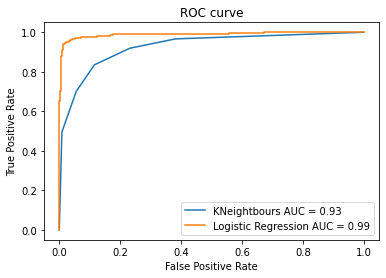

In [ ]:
ax1 = plt.plot(lr_fpr_n, lr_tpr_n)
ax2 = plt.plot(lr_fpr_l, lr_tpr_l)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend( ['KNeightbours AUC = 0.93', 'Logistic Regression AUC = 0.99' ])
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fitted_train = scaler.fit_transform(train.iloc[:, 1:-1])
fitted_test = scaler.transform(test.iloc[:, 1:-1])

In [ ]:
clf = LogisticRegression(random_state=0, max_iter = 1000).fit(fitted_train, train.iloc[:,-1])
log_preds = clf.predict_proba(fitted_test)

In [ ]:
log_preds.shape

(1000, 2)

In [ ]:
lr_fpr_l, lr_tpr_l, _ = roc_curve(test_y, log_preds[:,1])

In [ ]:
auc_l = auc(lr_fpr_l, lr_tpr_l)

In [ ]:
auc_l

0.990191148085885

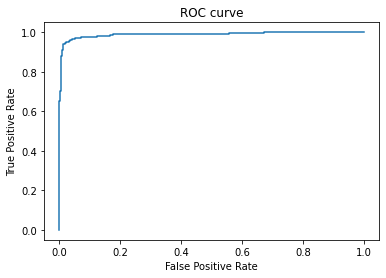

In [ ]:
plt.plot(lr_fpr, lr_tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
#plt.legend(loc="lower right")
plt.show()